# QPSK - Quadrature Phase Shift Keying


First of all, we need to import the libraries that we are going to use

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Build the constellation:

The constelation I used for QPSK is a 45 degree rotation of the points on the real and imaginary axis of unitary amplitude. The reason is that it becomes easier to demodulate those constelation points by using the quadrants of the complex plane.

In [2]:
qpsk_constellation=np.array([complex(1,1), complex(-1,1), complex(-1,-1), complex(1,-1)])
# showing the vector created
print(qpsk_constellation)

[ 1.+1.j -1.+1.j -1.-1.j  1.-1.j]


The next cell does the mapping from bits to constellation symbols

In [3]:
def qpsk_modulation(bits):
    """
    
    :param bits: Integer representation of the bits to be modulated. For BPSK Integer and Binary are the same.
    :type bits: int
    :return: The complex constellation symbol
    :rtype: complex
    """
    #complex_symbol=np.sqrt(2)*np.exp(1j*(np.pi*bits/2 + np.pi/4))
    try:
        return qpsk_constellation[bits]
    except IndexError:
        raise ValueError('{} is to large for this constellation.'.format(bin(bits)))
        
# print test
print(qpsk_modulation(3))

(1-1j)


Now, the demodulation will be performed according to which quadrant the complex number that is the input of the function is

In [4]:
def qpsk_demodulation(received_symbol):
    """
    
    :param received_symbol: The complex symbol to be demodulated.
    :type received_symbol: complex
    :return: The demodulated bits, represented as the corresponding Integer value.
    :rtype: int
    """
    if received_symbol.real >= 0:
        if received_symbol.imag >=0:            
            return complex(1,1)
        else:
            return complex(1,-1)
    else:
        if received_symbol.imag >=0:            
            return complex(-1,1)
        else:
            return complex(-1,-1)

# print test
print(qpsk_demodulation(-0.1+0.5j))

(-1+1j)


We are ready now to plot the constellation diagram

In [5]:
def plot_constellation(base=2):
    constellation = qpsk_constellation
    
    # Extract the x and y values for plotting
    in_phase = [x.real for x in constellation]
    quadrature = [y.imag for y in constellation]
    
    # The code word size, for QPSK = 2
    code_word_size = int(np.log2(np.size(constellation)))

    # Plot the constellatoin points
    plt.plot(in_phase, quadrature, 'o')
    plt.title("Constellation diagram")
    plt.xlabel("In-phase")
    plt.ylabel("Quadrature")
    plt.grid(True)
    
    # The following snippet of code just adds strings to the plot
    # with the bits the symbol is representing
    count = 0
    for symbol in constellation:
        if base == 2:
            plt_str = '{0:0{1:d}b}'.format(count, int(code_word_size))
        if base == 10:
            plt_str = '{0:d}'.format(count)
        # x and y cordinates for the string are the real and imaginary parts of the symbol.
        plt.text(symbol.real, symbol.imag, plt_str)
        count += 1
        
    # Finally show the plot
    plt.figure(1)
    plt.show()

<IPython.core.display.Javascript object>


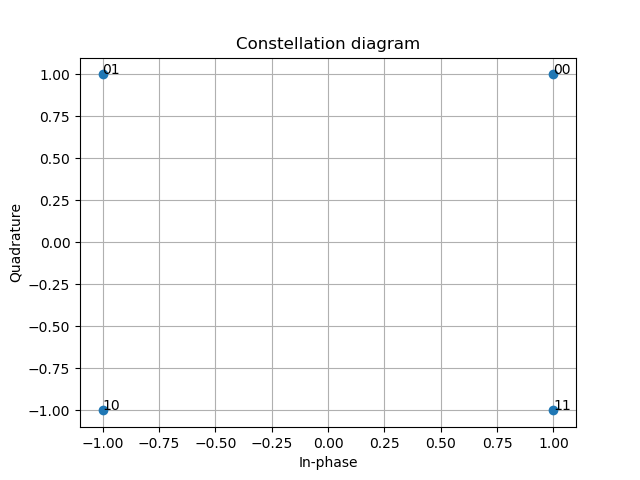

In [6]:
%matplotlib notebook
plot_constellation() 

Now it is time to plot the power spectral density of the QPSK modulation. For that, I used the formula given in the compendium "Introduction to Digital Communications", by Göran Lindel:
$$  R(f)=\bar{P}\left(\frac{|G(f+f_c)|^2}{2E_g}+\frac{|G(f-f_c)|^2}{2E_g}\right)  $$
Where $R(f)$ represents the power spectral density, $\bar{P}$ is the average power contained in a square pulse, $E_g$ is the energy contained in the pulse and $G(f)$ is the Fourier Transform of the square pulse.
We know also that $ G(f)=ATsinc(fT) $ (see appendix D of the same book), where $T$ is the duration of the pulse and $A$ is the amplitude.

If we shift the frequency back to the origin and normalize the magnitude by the value of the function in $f=0$ we end up with simply $|sinc(fT)|^2$

Now, if we consider on the horizontal axis the variable $fT_B$ as our measure, we can call that new variable by $x$, for example: $x=fT_B$. In the QPSK modulation two bits are transmited with one symbol, that is the same as saying that the time for one bit to be transmited is half of a symbol time: $T_B=T/2$. With that in mind we can do a change of variables $fT=2fT_B\rightarrow 2x $

Finally we take the final result in dB scale applying the $10\log()$ to it. If we call the new variable that we are going to plot by $S(x)$, then we have
$$ S(x)=10 \log (|sinc(2x)|^2) $$

<IPython.core.display.Javascript object>


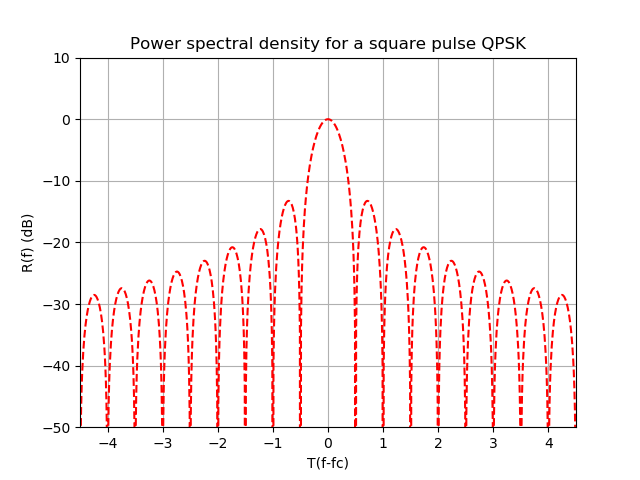

In [11]:
t = np.arange(-4.5, 4.5, 0.01)

plt.figure(2)
plt.plot(t, 10*np.log10((np.sinc(2*t))**2), 'r--')
plt.title("Power spectral density for a square pulse QPSK")
plt.xlabel("T(f-fc)")
plt.ylabel("R(f) (dB)")
plt.grid(True)
axes = plt.gca()
axes.set_ylim([-50,10])
axes.set_xlim([-4.5,4.5])
plt.show()